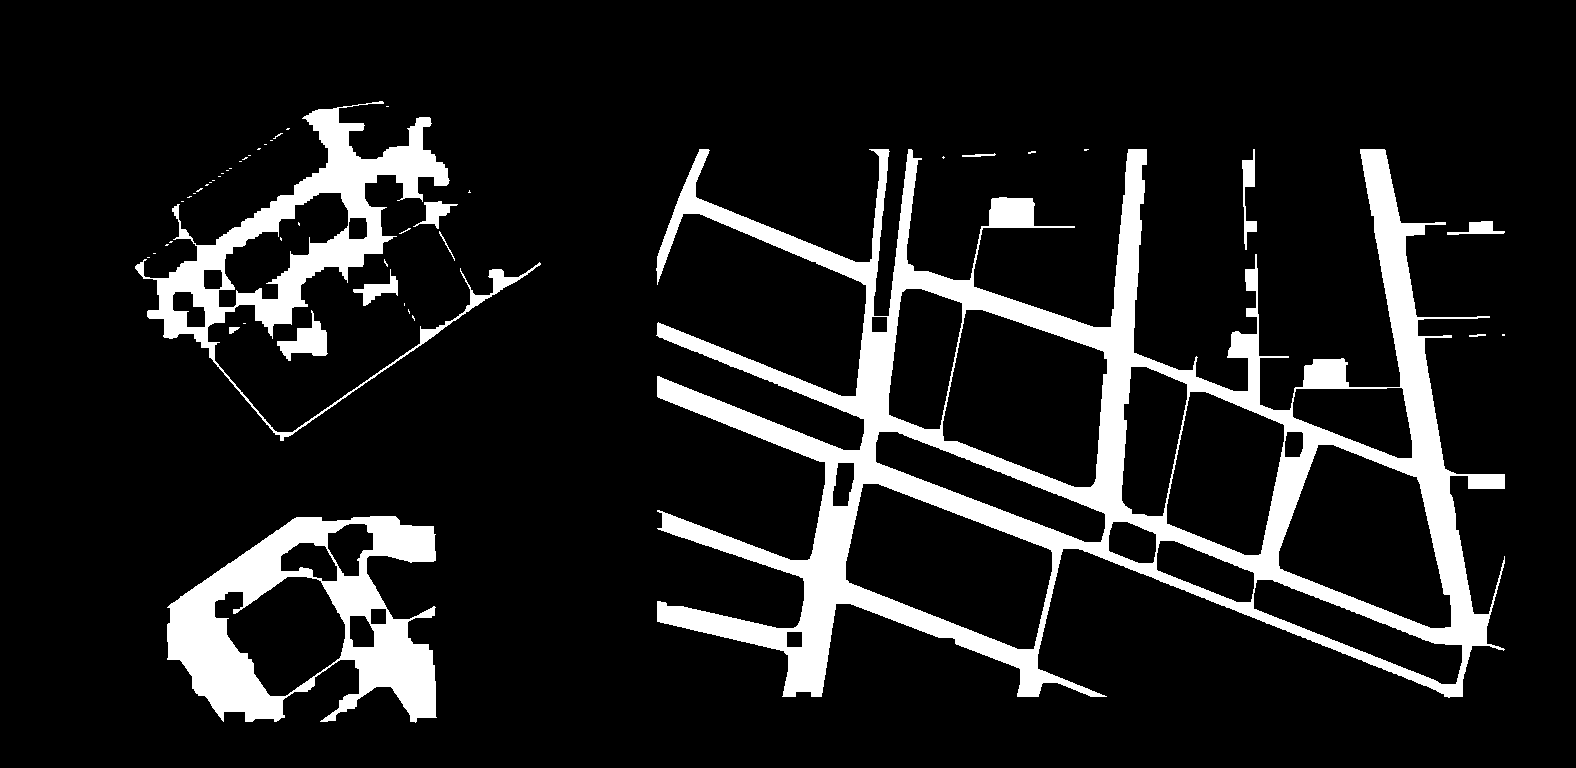

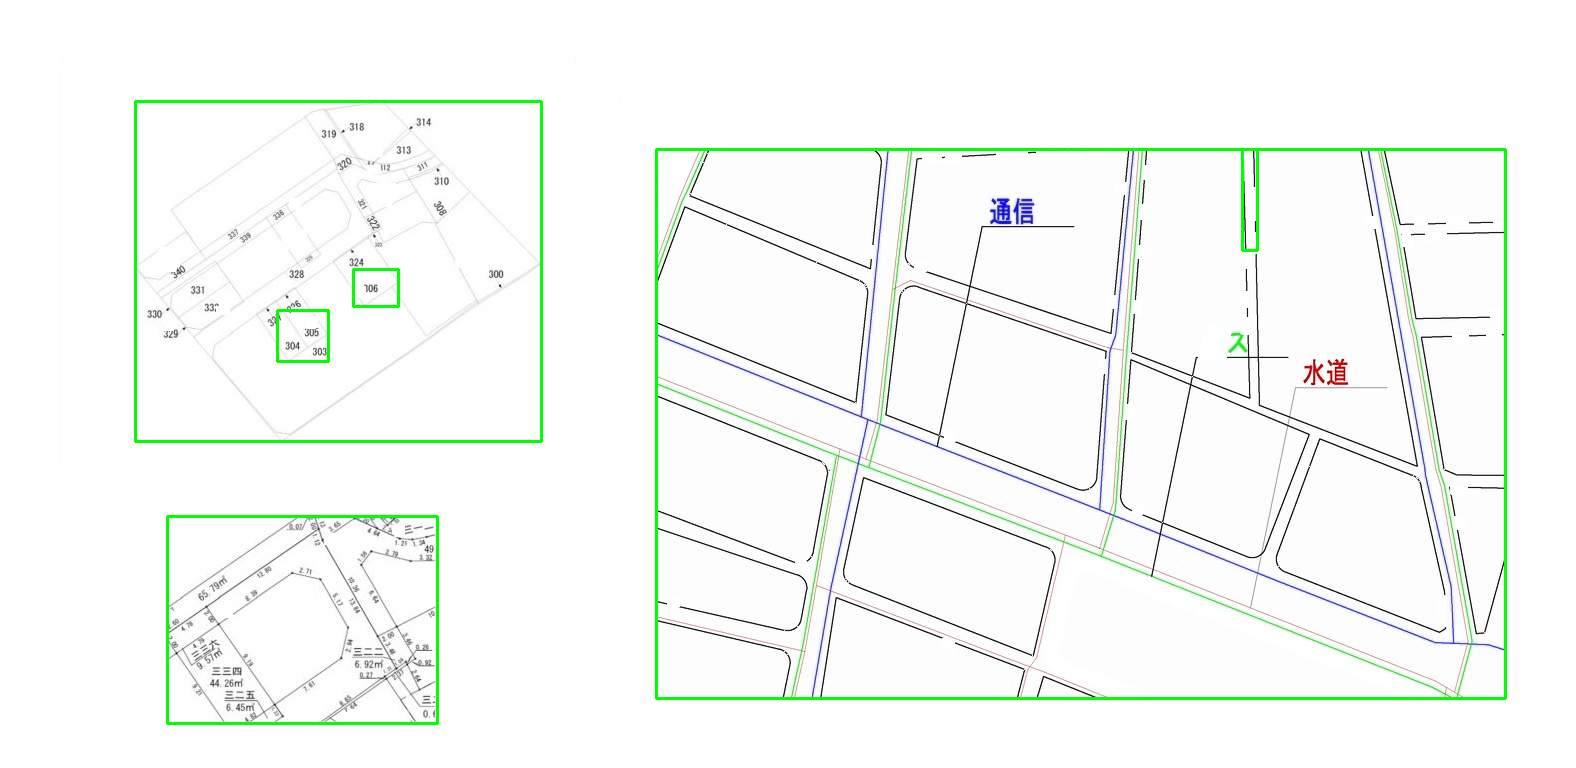

In [24]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

image_path = '../test_data/input/test_3.jpg'  # 画像パスを指定

# 画像の読み込み
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 二値化処理
_, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# カーネルの定義
kernel_s = np.ones((3,3), np.uint8)
kernel_m = np.ones((7,7), np.uint8)
kernel_l = np.ones((15,15), np.uint8)
kernel_line = np.array([[0, 1, 0],
                       [0, 1, 0],
                       [0, 1, 0]], dtype=np.uint8)  # 縦線用

kernel_horizontal = np.array([[0, 0, 0],
                            [1, 1, 1],
                            [0, 0, 0]], dtype=np.uint8)  # 横線用
#
close = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_s, iterations=1)

vertical = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_line)
horizontal = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_horizontal)
# 線パターンの結合
combined_lines = cv2.bitwise_or(vertical, horizontal)

# ノイズ除去（小さな孤立した線の除去）
# kernel_s = np.ones((3,3), np.uint8)
# denoised = cv2.morphologyEx(combined_lines, cv2.MORPH_OPEN, kernel_s)

# 格子パターンの検出
# より大きな構造を見つけるための処理
kernel_l = np.ones((15,15), np.uint8)
grid_patterns = cv2.morphologyEx(combined_lines, cv2.MORPH_CLOSE, kernel_l)

# 連続した線領域のラベリング
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(grid_patterns)
    
# 結果画像の準備
result_image = image.copy()
detected_patterns = []

# 面積による大きな線パターンの検出
min_area = 500  # 最小面積（調整可能）

for i in range(1, num_labels):  # 0はバックグラウンド
    if stats[i, cv2.CC_STAT_AREA] > min_area:
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        
        # 矩形の描画
        cv2.rectangle(result_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # パターン情報の保存
        detected_patterns.append({
            'x': x,
            'y': y,
            'width': w,
            'height': h,
            'area': stats[i, cv2.CC_STAT_AREA],
            'center': (int(centroids[i][0]), int(centroids[i][1]))
        })

diff = cv2.absdiff(binary, combined_lines)

display(Image.fromarray(grid_patterns))
display(Image.fromarray(result_image))

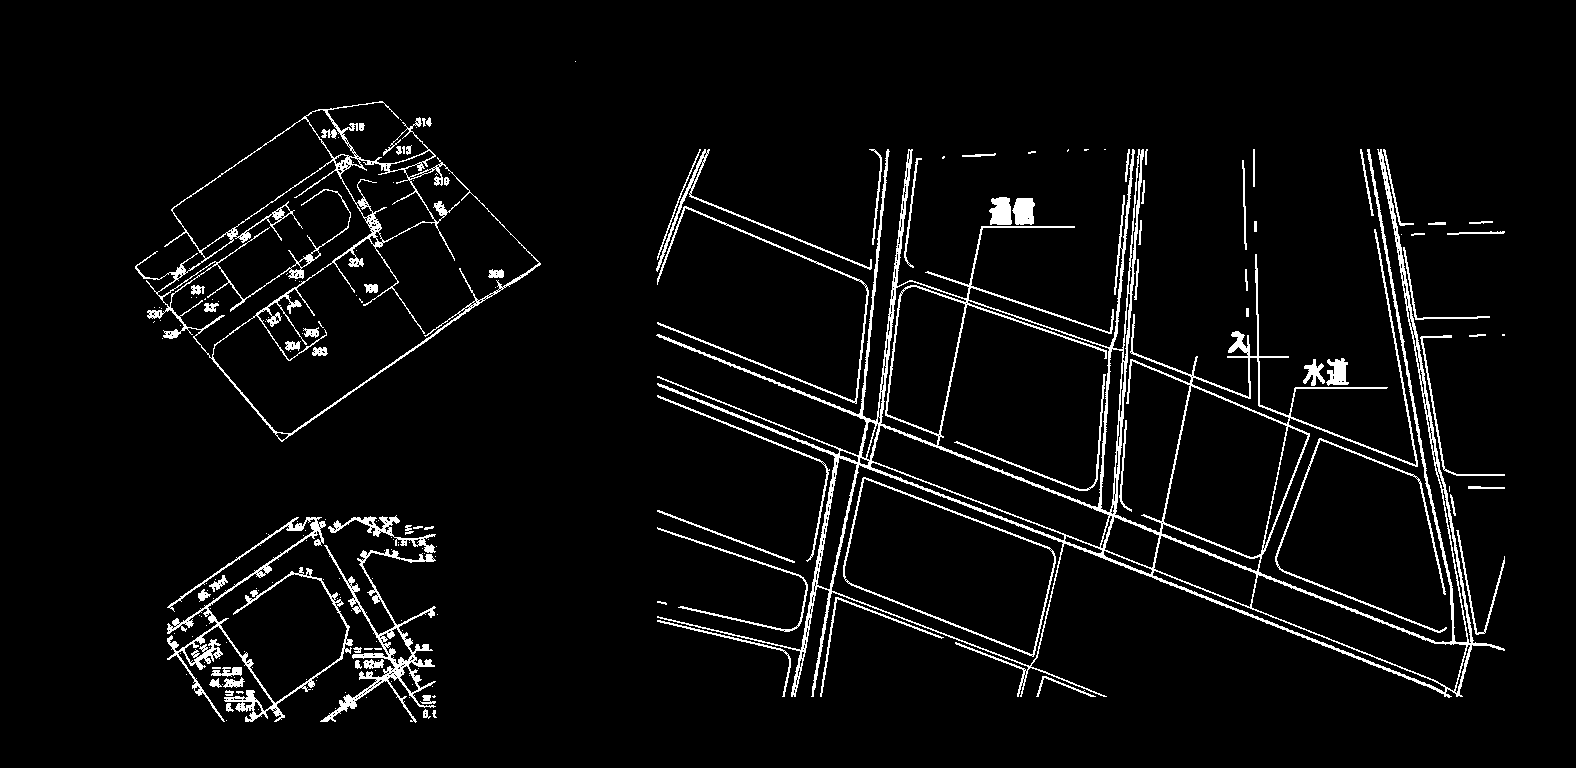

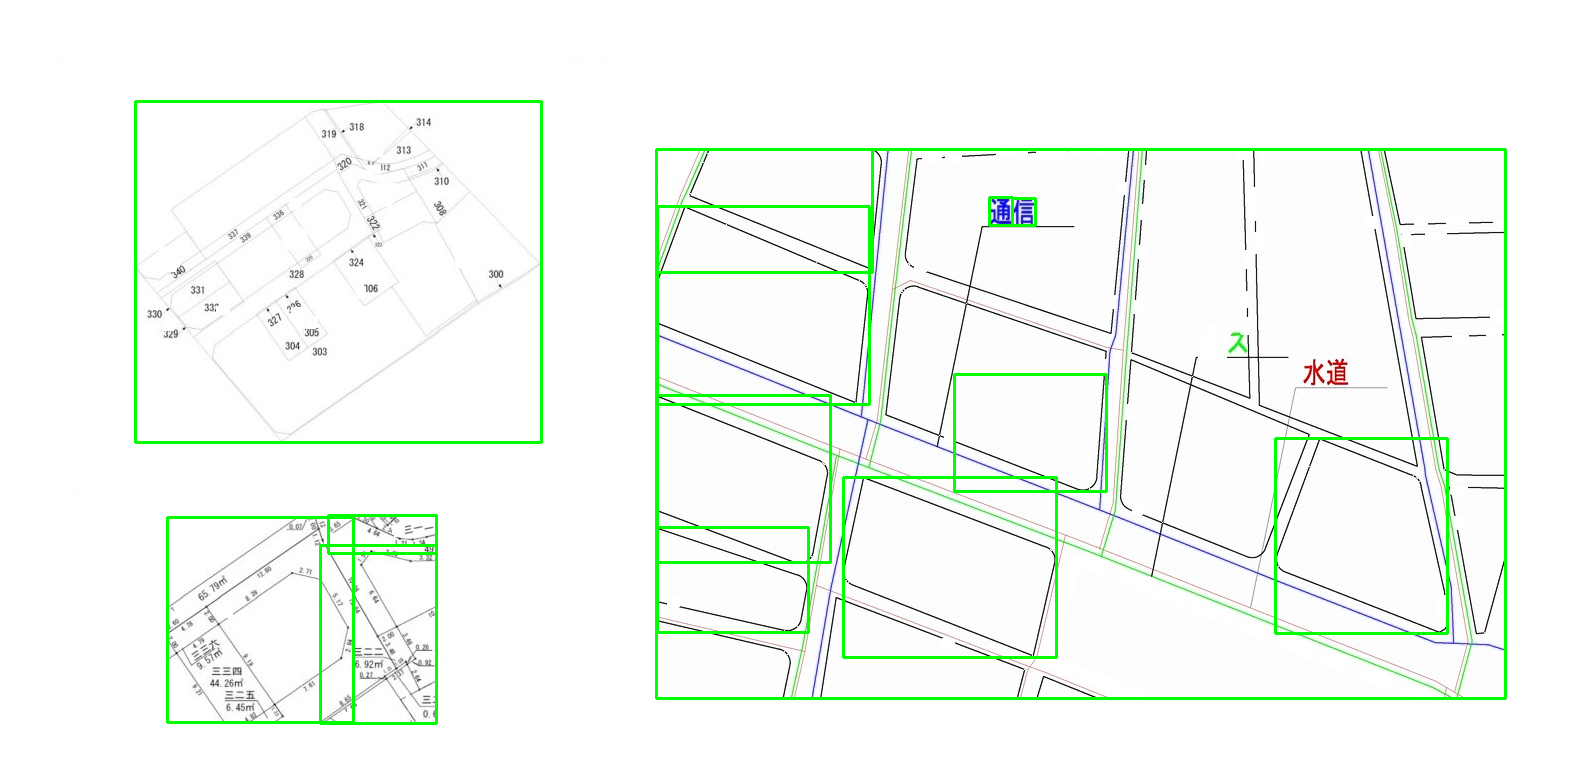

In [25]:
# 連続した線領域のラベリング
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)
    
# 結果画像の準備
result_image = image.copy()
detected_patterns = []

# 面積による大きな線パターンの検出
min_area = 500  # 最小面積（調整可能）

for i in range(1, num_labels):  # 0はバックグラウンド
    if stats[i, cv2.CC_STAT_AREA] > min_area:
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        
        # 矩形の描画
        cv2.rectangle(result_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # パターン情報の保存
        detected_patterns.append({
            'x': x,
            'y': y,
            'width': w,
            'height': h,
            'area': stats[i, cv2.CC_STAT_AREA],
            'center': (int(centroids[i][0]), int(centroids[i][1]))
        })

display(Image.fromarray(binary))
display(Image.fromarray(result_image))